# **WIP**

3 Topics: (Undecided)
  1. Impact of AI on teaching and learning
  2. Ethical concerns about AI in education
  3. Implementation of AI in education tools

## **Download required libraries**

In [ ]:
!pip install gensim
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Download stopwords from nltk**

## **Import required libraries**

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# vis
import pyLDAvis
import pyLDAvis.gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Data preprocessing**

In [ ]:
import re
import pandas as pd

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df['Content']

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Display the first few rows of the preprocessed data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:16: DeprecationWarning: invalid escape sequence '\.'
<>:16: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-21-af0e5d4643bd>:16: DeprecationWarning: invalid escape sequence '\.'
  df['Content'].map(lambda x: re.sub('[,\.!?]', '', x))


,Content
0,the education system that ai will destroy will...
1,ai tool sare very helpful but you need to use ...
2,ai and teachers should join forces in a collab...
3,kids that learn how to use the ai will realize...
4,but here’s the thing if we embrace the ai how ...
...,...
159,deped should come up with procedural academic ...
160,i used to be a student and now i am a teacher ...
161,these free ai educational apps are revolutiona...
162,this widespread adoption of ai teaching assist...


## **Stop words**

In [ ]:
stop_words = set()

# English stop words
english_stop_words = set(stopwords.words('english'))
stop_words.update(english_stop_words)

# Tagalog stop words
filename = ['tagalog_stop_words.txt']

# Add Tagalog stop words
for fname in filename:
  with open(fname) as f:
    for line in f:
      stop_words.add(line.strip())

# Print total number of unique stopwords
print(len(stop_words))

323


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

def preprocess(document):
    tokens = word_tokenize(document.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

tokenized_data = [preprocess(doc) for doc in content]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


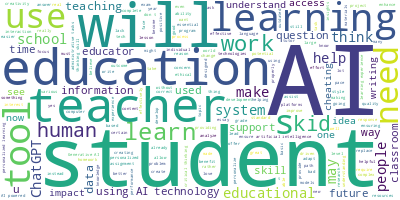

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['Content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## **Data Preparation for LDA**

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def sent_to_words(sentences):
  for sentence in sentences:
    # deacc=True removes punctuations
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = df.Content.values.tolist()
data_words = list(sent_to_words(data))

# Remove stopwords
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['education', 'system', 'ai', 'destroy', 'system', 'adapt', 'change', 'world', 'ai']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Display Results
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

In [ ]:
from pprint import pprint

# Build LDA Model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=3, passes=50, iterations=1000)

# Print the keyword in the 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.032*"ai" + 0.019*"learning" + 0.012*"student" + 0.010*"education" + '
  '0.010*"students" + 0.005*"educational" + 0.005*"data" + 0.004*"use" + '
  '0.004*"teachers" + 0.004*"may"'),
 (1,
  '0.027*"ai" + 0.021*"students" + 0.010*"learning" + 0.010*"education" + '
  '0.009*"time" + 0.008*"tools" + 0.008*"student" + 0.006*"teachers" + '
  '0.005*"content" + 0.005*"help"'),
 (2,
  '0.050*"ai" + 0.016*"students" + 0.013*"education" + 0.009*"teachers" + '
  '0.009*"use" + 0.008*"learn" + 0.007*"student" + 0.007*"need" + 0.007*"work" '
  '+ 0.007*"using"')]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Example with LDA model trained previously
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.35548059221597655
